# San Francisco Crime Data Analysis
In this project, we analyze crime data from San Francisco to uncover patterns in crime types, trends over time, and geographical crime hotspots. The objective is to provide insights that can help in resource allocation and crime prevention strategies.

## Dataset
The dataset contains information on crimes reported in San Francisco, including details such as:
- **Date and Time** of the crime
- **Location** (latitude and longitude)
- **Crime type** and **outcomes** (e.g., arrest made, citation issued)
- **Demographics** (age, race, and sex of subjects involved)

The goal is to analyze these variables to understand patterns and correlations between crime types, time, and geography.
Link where the dataset was taken from - https://openpolicing.stanford.edu/data/

## Analysis Overview
The analysis is divided into several parts:
1. **Data Loading and Exploration**: We begin by loading the data and exploring its structure, identifying missing values and understanding key variables.
2. **Handling Missing Data**: We clean the data by handling missing values in critical columns like `subject_age` and `subject_sex`.
3. **Exploratory Data Analysis (EDA)**: In this section, we visualize crime distributions, time-based trends, and demographic patterns.
4. **Feature Engineering**: We create new features such as time-based variables (hour, day of the week) and crime categories for further analysis.
5. **Correlation and Association Analysis**: We examine relationships between different variables, including correlations between numerical features and associations between categorical features.
6. **Geospatial Analysis**: Using `folium`, we create maps to visualize the geographic distribution of crimes and identify hotspots.


In [232]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from dython.nominal import associations


In [233]:
# Load the dataset
police_data = pd.read_csv(r"C:\Users\Mariana\Downloads\ca_san_francisco_2020_04_01.csv")
police_data['lng'].astype(float)

C:\Users\Mariana\AppData\Local\Temp\ipykernel_17168\2565834203.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  police_data = pd.read_csv(r"C:\Users\Mariana\Downloads\ca_san_francisco_2020_04_01.csv")


0        -122.445873
1        -122.468586
2        -122.426718
3        -122.392005
4        -122.440003
             ...    
905065   -122.496725
905066   -122.430272
905067   -122.401527
905068   -122.387067
905069   -122.430458
Name: lng, Length: 905070, dtype: float64

## Data Loading and Initial Exploration
The dataset contains records of various crimes committed in San Francisco. We start by exploring the structure of the data to understand the available features, their types, and the presence of any missing values.


In [234]:
# Display the first 5 rows
police_data.head(5)

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation


In [235]:
# Summary information about the dataset
police_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905070 entries, 0 to 905069
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   raw_row_number                     905070 non-null  object 
 1   date                               905070 non-null  object 
 2   time                               905035 non-null  object 
 3   location                           905027 non-null  object 
 4   lat                                903373 non-null  float64
 5   lng                                903373 non-null  float64
 6   district                           852883 non-null  object 
 7   subject_age                        846182 non-null  float64
 8   subject_race                       905070 non-null  object 
 9   subject_sex                        905070 non-null  object 
 10  type                               905070 non-null  object 
 11  arrest_made                        9050

In [236]:
police_data.shape

(905070, 22)

In [237]:
police_data.columns.tolist()

['raw_row_number',
 'date',
 'time',
 'location',
 'lat',
 'lng',
 'district',
 'subject_age',
 'subject_race',
 'subject_sex',
 'type',
 'arrest_made',
 'citation_issued',
 'warning_issued',
 'outcome',
 'contraband_found',
 'search_conducted',
 'search_vehicle',
 'search_basis',
 'reason_for_stop',
 'raw_search_vehicle_description',
 'raw_result_of_contact_description']

In [238]:
police_data.nunique()

raw_row_number                       905070
date                                   3468
time                                   1440
location                             313001
lat                                   62785
lng                                   52725
district                                 13
subject_age                              91
subject_race                              5
subject_sex                               2
type                                      1
arrest_made                               2
citation_issued                           2
warning_issued                            2
outcome                                   3
contraband_found                          2
search_conducted                          2
search_vehicle                            2
search_basis                              2
reason_for_stop                          26
raw_search_vehicle_description           36
raw_result_of_contact_description        27
dtype: int64

## Handling Missing Values
Since missing data can introduce bias, we handle missing values by dropping missing `subject_age`. 

In [239]:
# Checking for missing values
police_data.isnull().sum()

raw_row_number                            0
date                                      0
time                                     35
location                                 43
lat                                    1697
lng                                    1697
district                              52187
subject_age                           58888
subject_race                              0
subject_sex                               0
type                                      0
arrest_made                               0
citation_issued                           0
warning_issued                            0
outcome                               15681
contraband_found                     851689
search_conducted                          0
search_vehicle                            0
search_basis                         851689
reason_for_stop                        2212
raw_search_vehicle_description            0
raw_result_of_contact_description         0
dtype: int64

In [240]:
# Drop missing ages
police_data['subject_age'].dropna(inplace=True)
police_data.isnull().sum()

raw_row_number                            0
date                                      0
time                                     35
location                                 43
lat                                    1697
lng                                    1697
district                              52187
subject_age                           58888
subject_race                              0
subject_sex                               0
type                                      0
arrest_made                               0
citation_issued                           0
warning_issued                            0
outcome                               15681
contraband_found                     851689
search_conducted                          0
search_vehicle                            0
search_basis                         851689
reason_for_stop                        2212
raw_search_vehicle_description            0
raw_result_of_contact_description         0
dtype: int64

###Summary Statistics

In [241]:
police_data['subject_age'].describe()

count    846182.000000
mean         37.818577
std          13.632684
min          10.000000
25%          27.000000
50%          35.000000
75%          47.000000
max         100.000000
Name: subject_age, dtype: float64

In [242]:
police_data.describe(include='O')

,raw_row_number,date,time,location,district,subject_race,subject_sex,type,outcome,contraband_found,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
count,905070,905070,905035,905027,852883,905070,905070,905070,889389,53381,53381,902858,905070,905070
unique,905070,3468,1440,313001,13,5,2,1,3,2,2,26,36,27
top,893009,2009-03-20,23:00:00,FILLMORE/OFARRELL,H,white,male,vehicular,citation,False,other,Moving Violation,No Search,Citation
freq,1,630,6002,1249,117520,372318,639219,905070,631602,45405,48676,563105,851482,631276


## Exploratory Data Analysis (EDA):

### Demographic Analysis
The very first set of plots explores the distribution of crimes based on demographic factors such as the age, race, and gender of the subjects involved.

1. **Age Distribution**: 
   The age distribution shows that most crimes involve individuals in the 25-35 age range, with very few cases involving minors or the elderly.

2. **Race Distribution**:
   The race distribution chart highlights the racial composition of individuals involved in crimes. This can be useful for identifying potential disparities or biases in law enforcement interactions.

3. **Gender Distribution**:
   A breakdown by gender shows whether one gender is disproportionately involved in or affected by certain types of crimes.


In [243]:
#Distribution of subjects sex within a dataset
police_data['subject_sex'].value_counts().reset_index()

,subject_sex,count
0,male,639219
1,female,265851


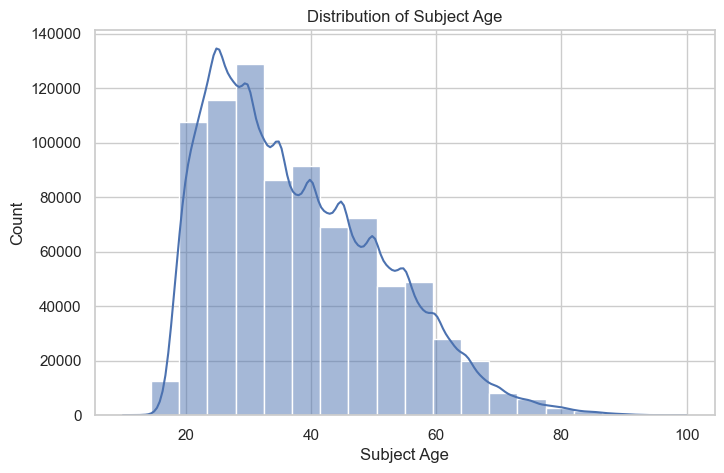

In [244]:
# Plot the distribution of subject_age
plt.figure(figsize=(8,5))
sns.histplot(police_data['subject_age'].dropna(), kde=True, bins=20)
plt.title('Distribution of Subject Age')
plt.xlabel('Subject Age')
plt.ylabel('Count')
plt.show()

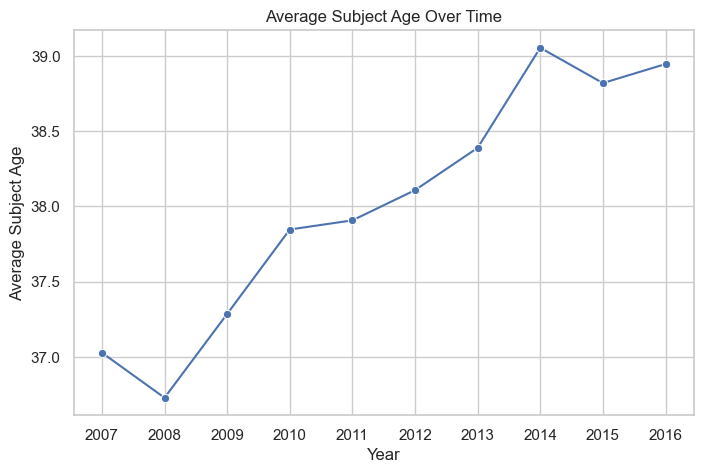

In [245]:
# Group by year and calculate mean age
police_data['year'] = police_data['date'].astype(str).str[0:4]
age_by_year = police_data.groupby('year')['subject_age'].mean()

# Plot the mean age over time
plt.figure(figsize=(8,5))
sns.lineplot(x=age_by_year.index, y=age_by_year.values, marker='o')
plt.title('Average Subject Age Over Time')
plt.xlabel('Year')
plt.ylabel('Average Subject Age')
plt.show()


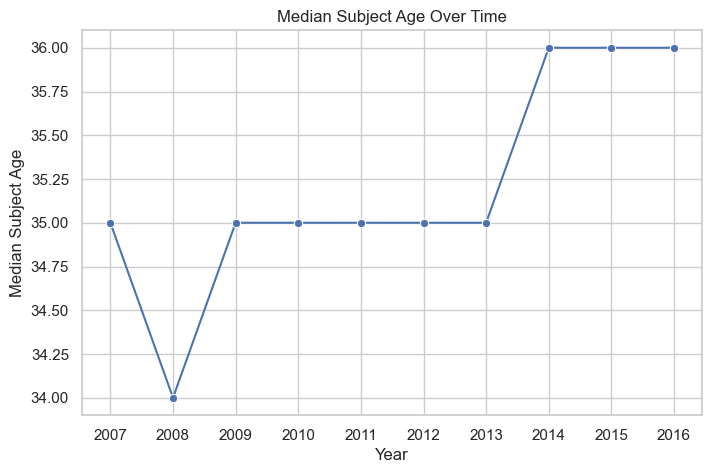

In [276]:
# Group by year and calculate mean age
police_data['year'] = police_data['date'].astype(str).str[0:4]
age_by_year = police_data.groupby('year')['subject_age'].median()

# Plot the mean age over time
plt.figure(figsize=(8,5))
sns.lineplot(x=age_by_year.index, y=age_by_year.values, marker='o')
plt.title('Median Subject Age Over Time')
plt.xlabel('Year')
plt.ylabel('Median Subject Age')
plt.show()

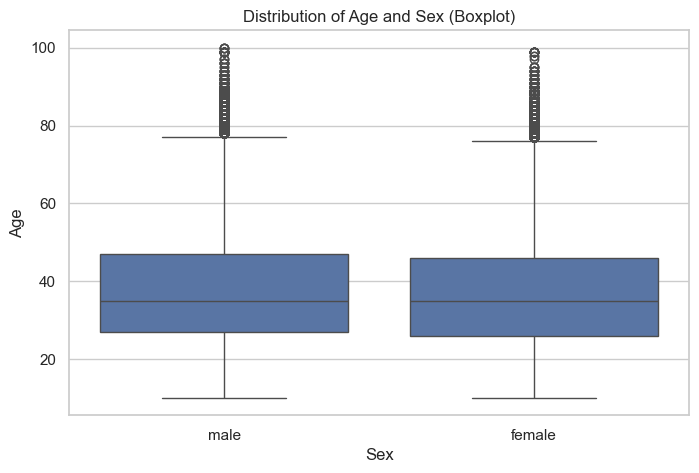

In [246]:
# Prot the distribution of sex vs age within a dataset
police_data_cleaned = police_data.dropna(subset=['subject_age', 'subject_sex'])

plt.figure(figsize=(8,5))
sns.boxplot(x='subject_sex', y='subject_age', data=police_data_cleaned)

plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Distribution of Age and Sex (Boxplot)')
plt.show()

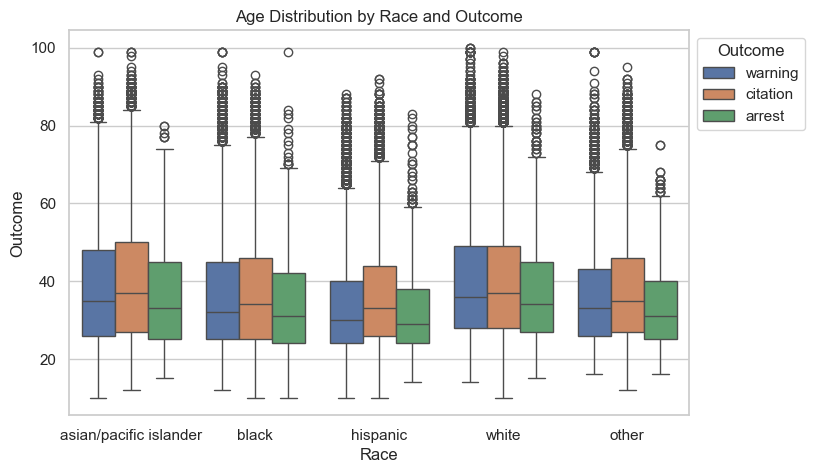

In [247]:
# Boxplot to see the distribution of subject_age by race and outcome
plt.figure(figsize=(8,5))
sns.boxplot(x='subject_race', y='subject_age', hue='outcome', data=police_data)
plt.legend(title="Outcome", loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Race')
plt.ylabel('Outcome')
plt.title('Age Distribution by Race and Outcome')
plt.show()


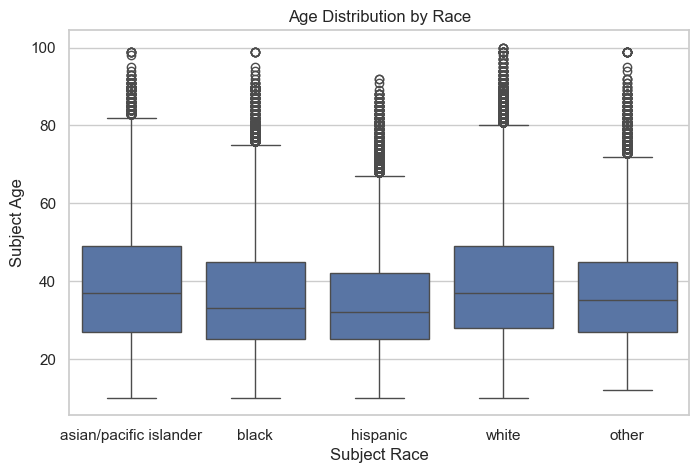

In [248]:
# Plot boxplot of age by race
plt.figure(figsize=(8,5))
sns.boxplot(x='subject_race', y='subject_age', data=police_data)

plt.title('Age Distribution by Race')
plt.xlabel('Subject Race')
plt.ylabel('Subject Age')
plt.show()

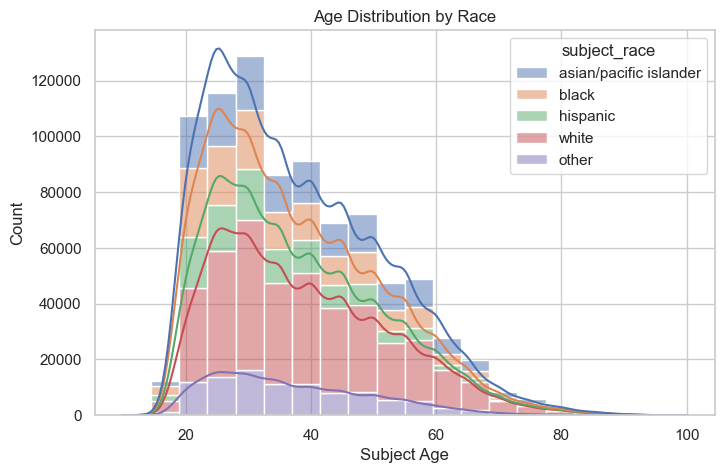

In [249]:
# Plot age distribution for each race
plt.figure(figsize=(8,5))
sns.histplot(data=police_data, x='subject_age', hue='subject_race', kde=True, multiple='stack', bins=20)

plt.title('Age Distribution by Race')
plt.xlabel('Subject Age')
plt.ylabel('Count')
plt.show()

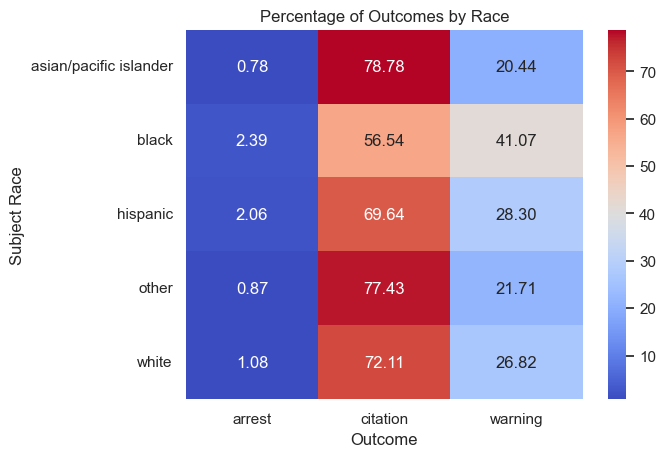

In [250]:
# Create a pivot table showing percentage of each outcome by race
race_outcome_pct = police_data.pivot_table(index='subject_race', 
                                           columns='outcome', 
                                           aggfunc='size', 
                                           fill_value=0)

# Normalize the table by rows (race groups) to get percentages
race_outcome_pct = race_outcome_pct.div(race_outcome_pct.sum(axis=1), axis=0) * 100

# Visualize as a heatmap
sns.heatmap(race_outcome_pct, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Percentage of Outcomes by Race')
plt.xlabel('Outcome')
plt.ylabel('Subject Race')
plt.show()


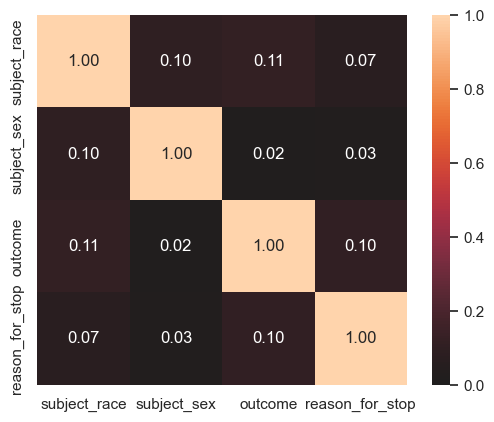

In [251]:
# Correlation between categorical values such as race, sex, outcome and reason for stop
police_data_cleaned = police_data.dropna(subset=['subject_race', 'subject_sex', 'outcome', 'reason_for_stop'])

categorical_columns = ['subject_race', 'subject_sex', 'outcome', 'reason_for_stop']

cramer_v = associations(police_data_cleaned[categorical_columns], nominal_columns='all')['corr']


#### Conclusions
The analysis reveals that individuals aged between 25 and 35 experience the highest stop rates. Interestingly, both the average and median ages have remained consistent over time, indicating stability in the age distribution.

When comparing age and sex, the visual representation shows that the average age is similar across both male and female categories, though there are several outliers in each group. This suggests no significant age-related disparity in stop rates by gender.

Regarding race and outcomes, there is no substantial variation between different racial groups in terms of age or overall outcomes. However, a notable pattern emerges from the heatmap: individuals identified as "Black" are just as likely to receive a warning as a citation, whereas for all other racial groups, citations are far more common than warnings.

Lastly, there is no significant correlation between categorical variables such as race, sex, outcome, and the reason for the stop. This suggests that demographic factors do not strongly predict the type of outcome or reason for being stopped.

### Crime Type Distribution



In [252]:
# Distribution of crime types
crime_type_counts = police_data['reason_for_stop'].value_counts().reset_index()
crime_type_counts

,reason_for_stop,count
0,Moving Violation,563105
1,Mechanical or Non-Moving Violation (V.C.),331477
2,MPC Violation,3542
3,Traffic Collision,1343
4,BOLO/APB/Warrant,1207
5,DUI Check,1037
6,Assistance to Motorist,930
7,Moving Violation|Mechanical or Non-Moving Viol...,171
8,Moving Violation|MPC Violation,14
9,Moving Violation|NA,5


Text(0, 0.5, 'Number of Crimes')

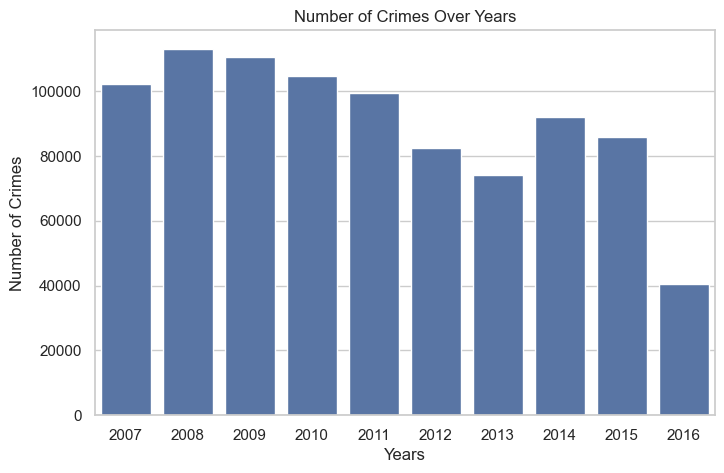

In [253]:
# Plrot number of crimes over years
crime_counts = police_data['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=crime_counts.index, y=crime_counts.values)
plt.title('Number of Crimes Over Years')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


Text(0, 0.5, 'Number of Crimes')

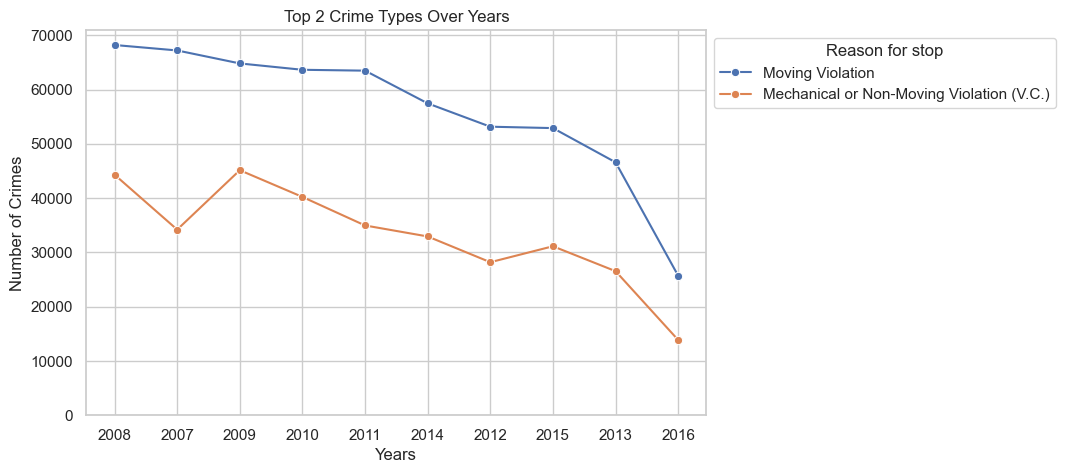

In [254]:
# Top 2 crime types over years
crime_years = police_data[['year','reason_for_stop']].value_counts().reset_index().sort_values(['count'], ascending=False).head(20)


plt.figure(figsize=(8,5))
sns.lineplot(crime_years, x= 'year', y='count', hue='reason_for_stop', marker='o')
plt.legend(title="Reason for stop", loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0)
plt.title('Top 2 Crime Types Over Years')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


### Time-based Analysis of Crimes


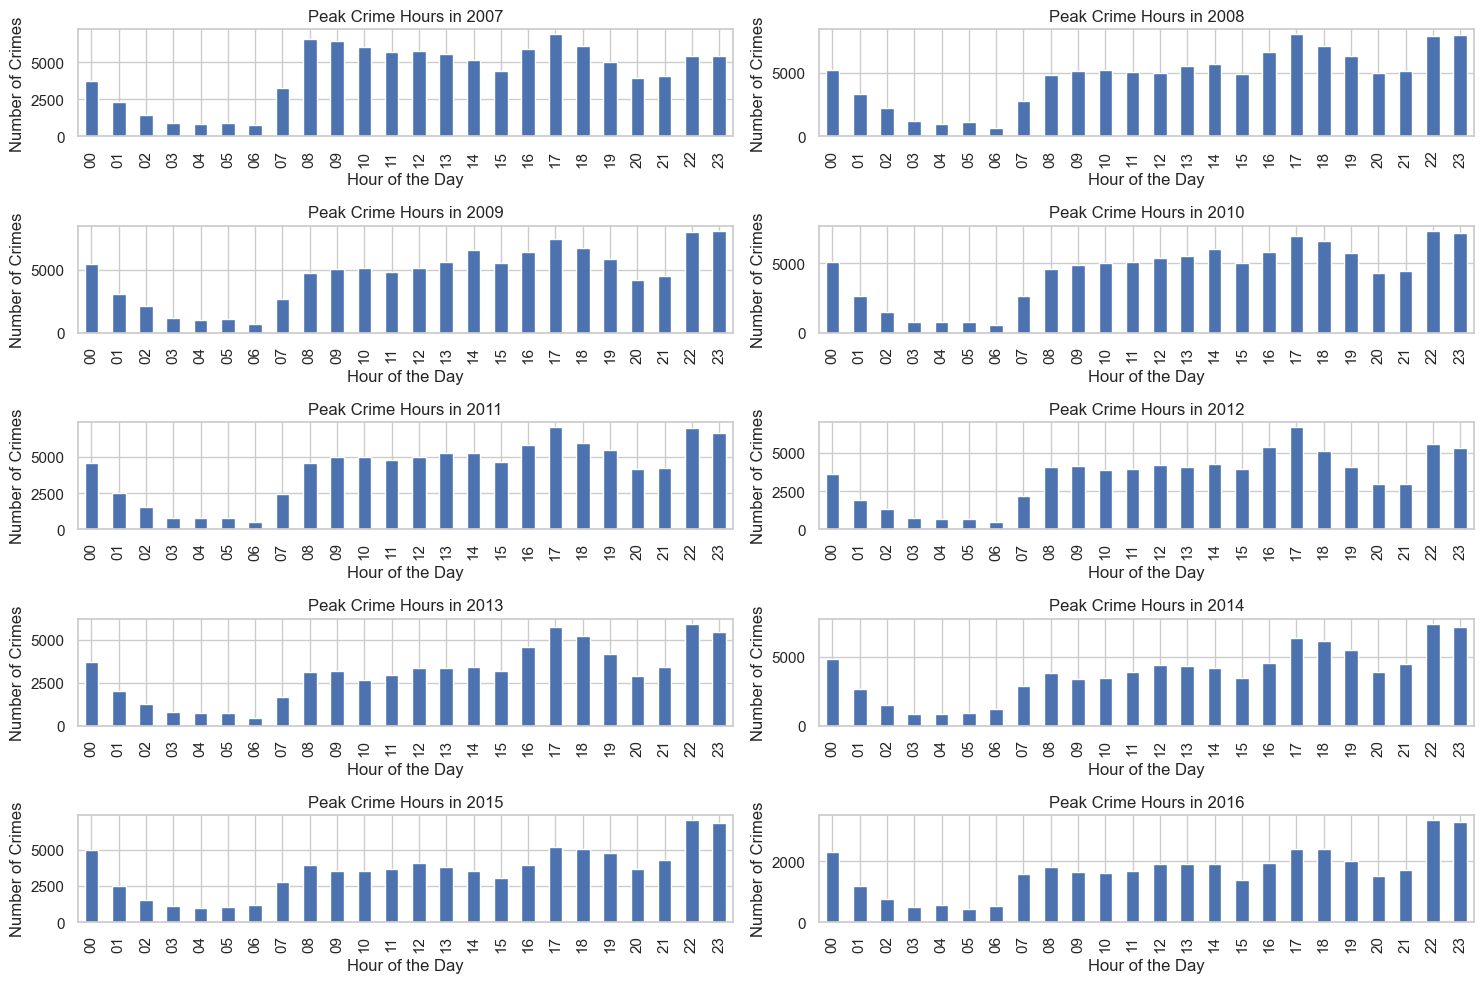

In [255]:
# Peak crime hours by years
police_data['hour'] = police_data['time'].dropna().astype(str).str[0:2]

unique_years = sorted(police_data['year'].unique())

fig, axs = plt.subplots(len(unique_years) // 2, 2, figsize=(15, 10))

for i, year in enumerate(unique_years):
    row = i // 2
    col = i % 2
    subset = police_data[police_data['year'] == year]
    crime_hours = subset['hour']
    crime_hours.value_counts().sort_index().plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(f'Peak Crime Hours in {year}')
    axs[row, col].set_xlabel('Hour of the Day')
    axs[row, col].set_ylabel('Number of Crimes')

plt.tight_layout()
plt.show()

In [257]:
# Convert the 'date' column to datetime
police_data['date'] = pd.to_datetime(police_data['date'], errors='coerce')

# Check for any conversion errors
print(police_data['date'].isnull().sum(), "rows have invalid dates.")


0 rows have invalid dates.


In [260]:
# Extract year, month, day, and day of week from the 'date' column
police_data['day'] = police_data['date'].dt.day
police_data['day_of_week'] = police_data['date'].dt.day_name()

print(police_data[['date', 'year', 'month', 'day', 'day_of_week']].head())


        date  year month  day day_of_week
0 2014-08-01  2014    08    1      Friday
1 2014-08-01  2014    08    1      Friday
2 2014-08-01  2014    08    1      Friday
3 2014-08-01  2014    08    1      Friday
4 2014-08-01  2014    08    1      Friday


In [261]:
# Aggregate data by year
yearly_counts = police_data.groupby('year').size().reset_index(name='counts')

print(yearly_counts)


   year  counts
0  2007  102196
1  2008  113125
2  2009  110612
3  2010  104770
4  2011   99507
5  2012   82391
6  2013   74162
7  2014   91961
8  2015   85998
9  2016   40348


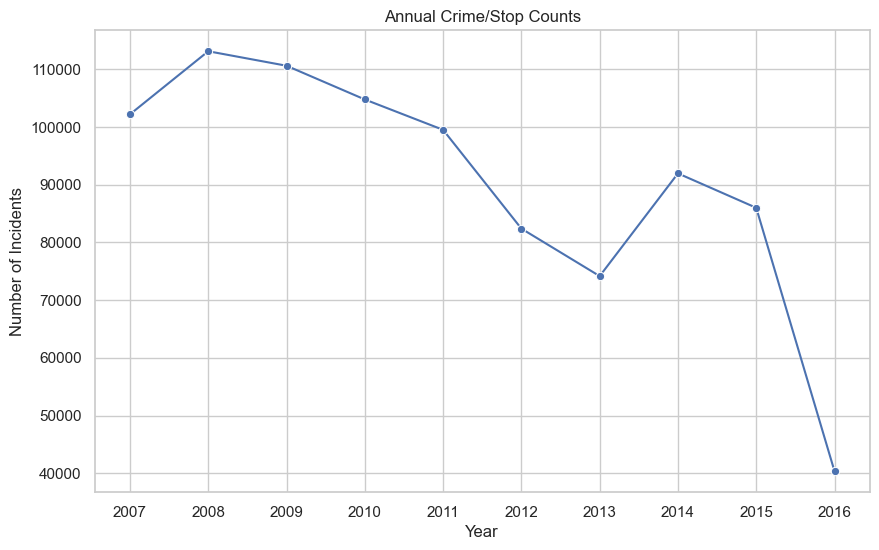

In [262]:
# Create a line plot for annual counts
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_counts, x='year', y='counts', marker='o')

plt.title('Annual Crime/Stop Counts')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(yearly_counts['year'])  # Ensure all years are labeled
plt.show()


In [263]:
# Aggregate data by month
monthly_counts = police_data.groupby('month').size().reset_index(name='counts')

# Display the aggregated data
print(monthly_counts)


   month  counts
0     01   86542
1     02   81783
2     03   86662
3     04   78720
4     05   82494
5     06   71437
6     07   71377
7     08   72369
8     09   71167
9     10   71079
10    11   68934
11    12   62506


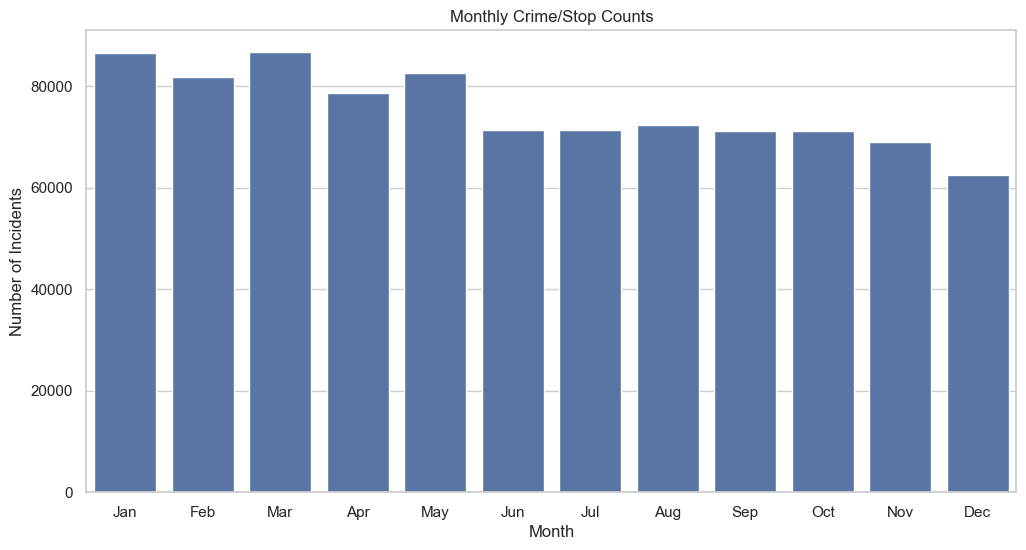

In [264]:
# Create a bar plot for monthly counts
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_counts, x='month', y='counts')

plt.title('Monthly Crime/Stop Counts')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [265]:
# Aggregate data by day of the week
weekday_counts = police_data.groupby('day_of_week').size().reset_index(name='counts')

# To order the days correctly
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts['day_of_week'] = pd.Categorical(weekday_counts['day_of_week'], categories=weekday_order, ordered=True)
weekday_counts = weekday_counts.sort_values('day_of_week')

# Display the aggregated data
print(weekday_counts)


  day_of_week  counts
1      Monday  123065
5     Tuesday  132574
6   Wednesday  150033
4    Thursday  135851
0      Friday  130822
2    Saturday  122362
3      Sunday  110363


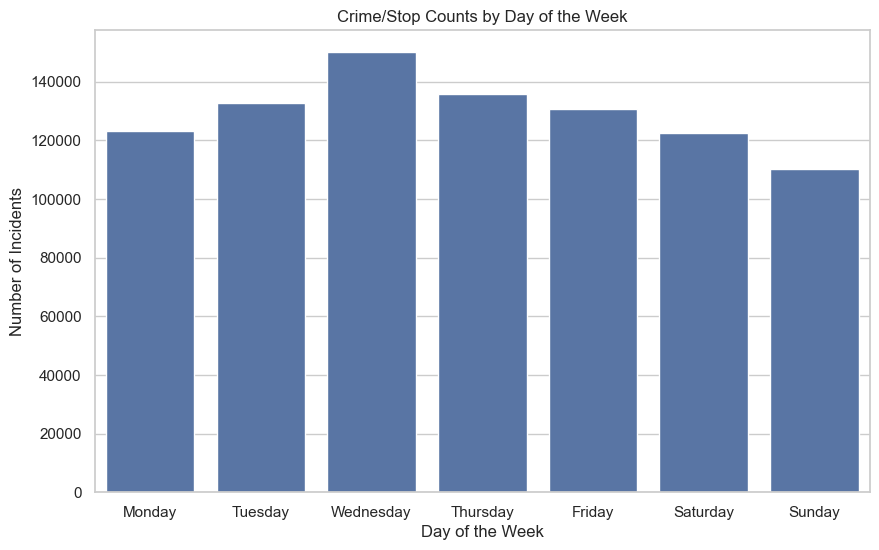

In [266]:
# Create a bar plot for weekday counts
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_counts, x='day_of_week', y='counts')
plt.title('Crime/Stop Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()


In [267]:
# Aggregate data by day
daily_counts = police_data.groupby('day').size().reset_index(name='counts')

# Display the aggregated data
print(daily_counts)


    day  counts
0     1   29640
1     2   31135
2     3   30611
3     4   29465
4     5   30565
5     6   29369
6     7   29110
7     8   29517
8     9   30962
9    10   29864
10   11   31402
11   12   30633
12   13   29915
13   14   30082
14   15   30066
15   16   30004
16   17   30354
17   18   30261
18   19   29371
19   20   29338
20   21   29744
21   22   28657
22   23   29616
23   24   28578
24   25   28678
25   26   29358
26   27   29078
27   28   29380
28   29   26873
29   30   27040
30   31   16404


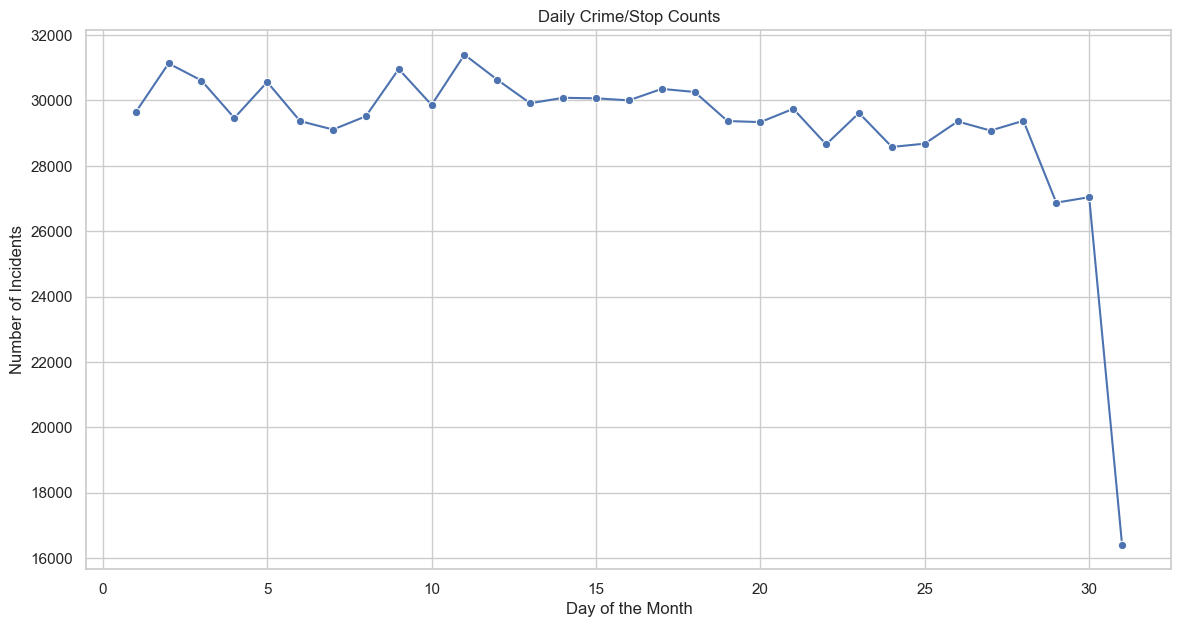

In [268]:
# Create a line plot for daily counts
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_counts, x='day', y='counts', marker='o')

plt.title('Daily Crime/Stop Counts')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Incidents')
plt.show()


In [269]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the data is sorted by date
police_data_sorted = police_data.sort_values('date')

# Set the 'date' column as the index
police_data_sorted.set_index('date', inplace=True)

# Resample data monthly and aggregate counts
monthly_time_series = police_data_sorted['year'].resample('M').size()

C:\Users\Mariana\AppData\Local\Temp\ipykernel_17168\2053623913.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_time_series = police_data_sorted['year'].resample('M').size()


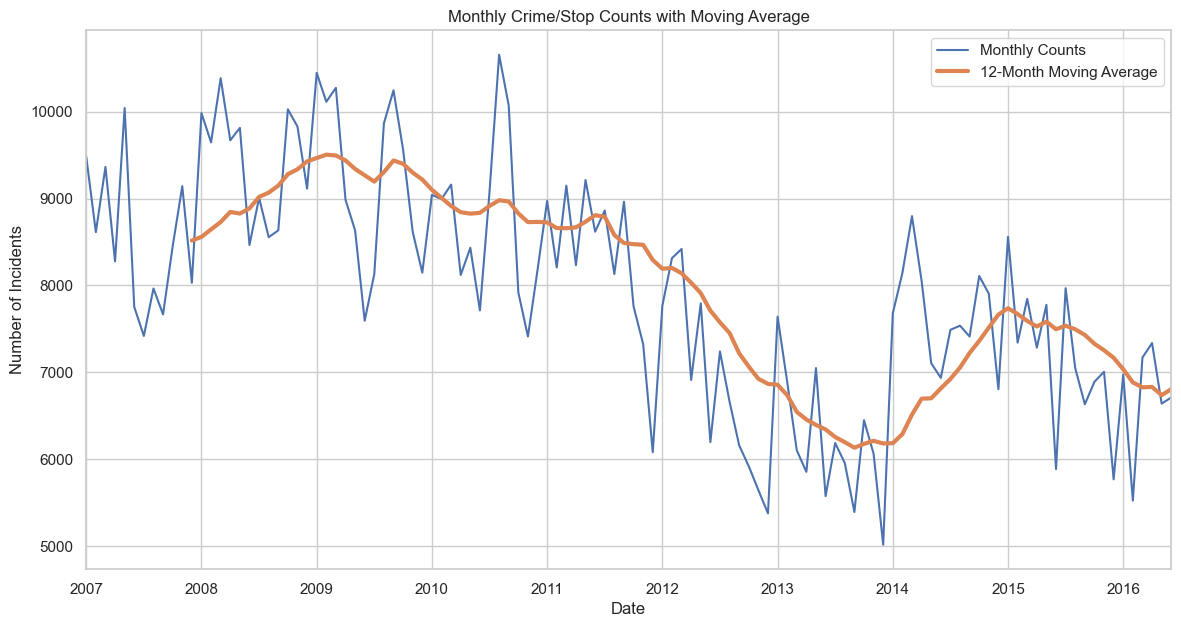

In [270]:
# Calculate a 12-month moving average
monthly_time_series_ma = monthly_time_series.rolling(window=12).mean()

# Plot the original time series and the moving average
plt.figure(figsize=(14, 7))
monthly_time_series.plot(label='Monthly Counts')
monthly_time_series_ma.plot(label='12-Month Moving Average', linewidth=3)
plt.title('Monthly Crime/Stop Counts with Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()



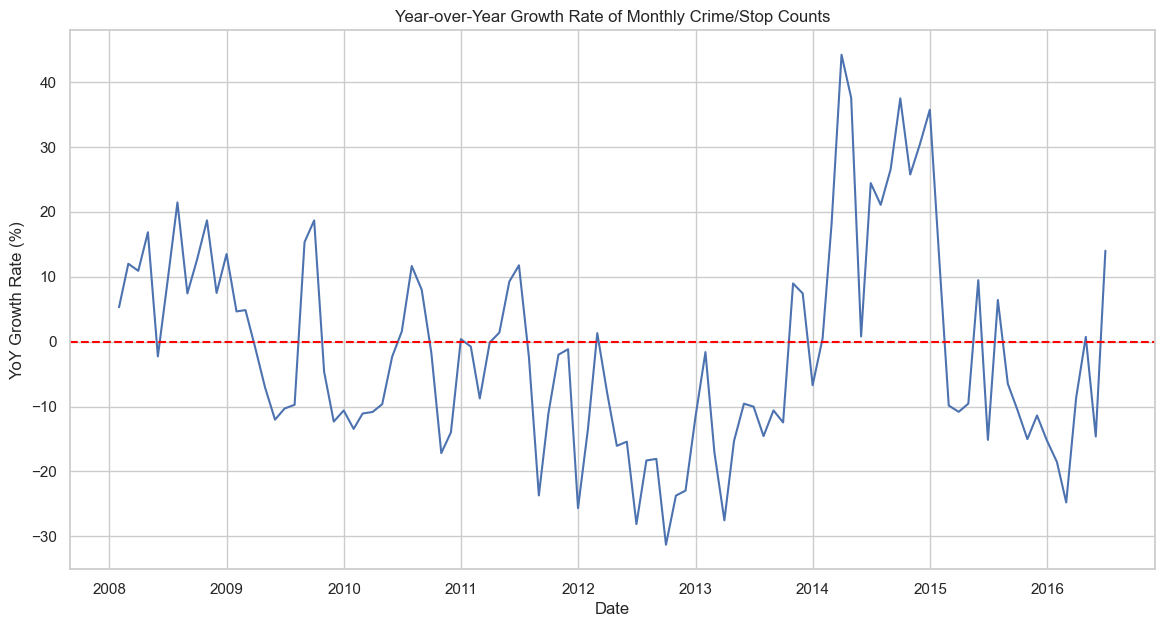

In [271]:
# Calculate YoY growth rate
monthly_time_series_yoy = monthly_time_series.pct_change(periods=12) * 100

# Plot YoY growth rates
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_time_series_yoy.index, y=monthly_time_series_yoy.values)
plt.title('Year-over-Year Growth Rate of Monthly Crime/Stop Counts')
plt.xlabel('Date')
plt.ylabel('YoY Growth Rate (%)')
plt.axhline(0, color='red', linestyle='--')
plt.show()


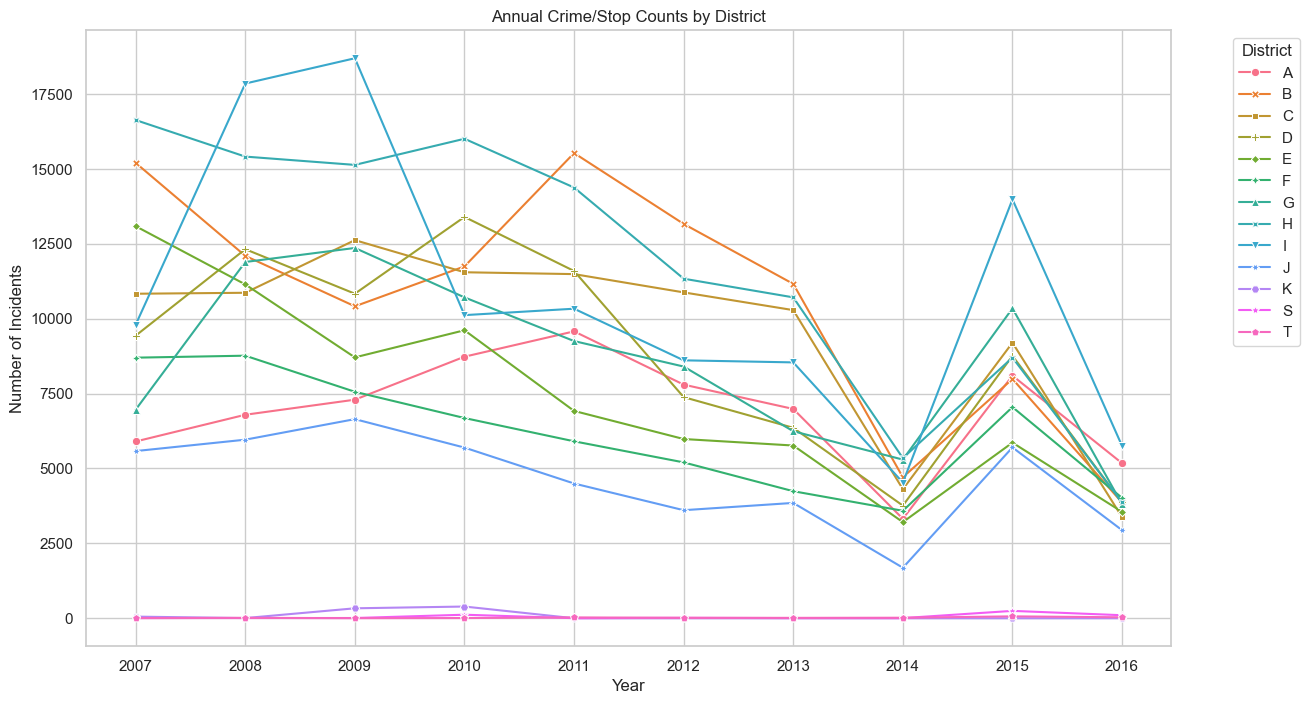

In [272]:
# Aggregate data by year and district
year_district_counts = police_data.groupby(['year', 'district']).size().reset_index(name='counts')

# Pivot the data for easier plotting
year_district_pivot = year_district_counts.pivot(index='year', columns='district', values='counts').fillna(0)

# Plot the trends for each district
plt.figure(figsize=(14, 8))
sns.lineplot(data=year_district_pivot, markers=True, dashes=False)
plt.title('Annual Crime/Stop Counts by District')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



c:\Users\Mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


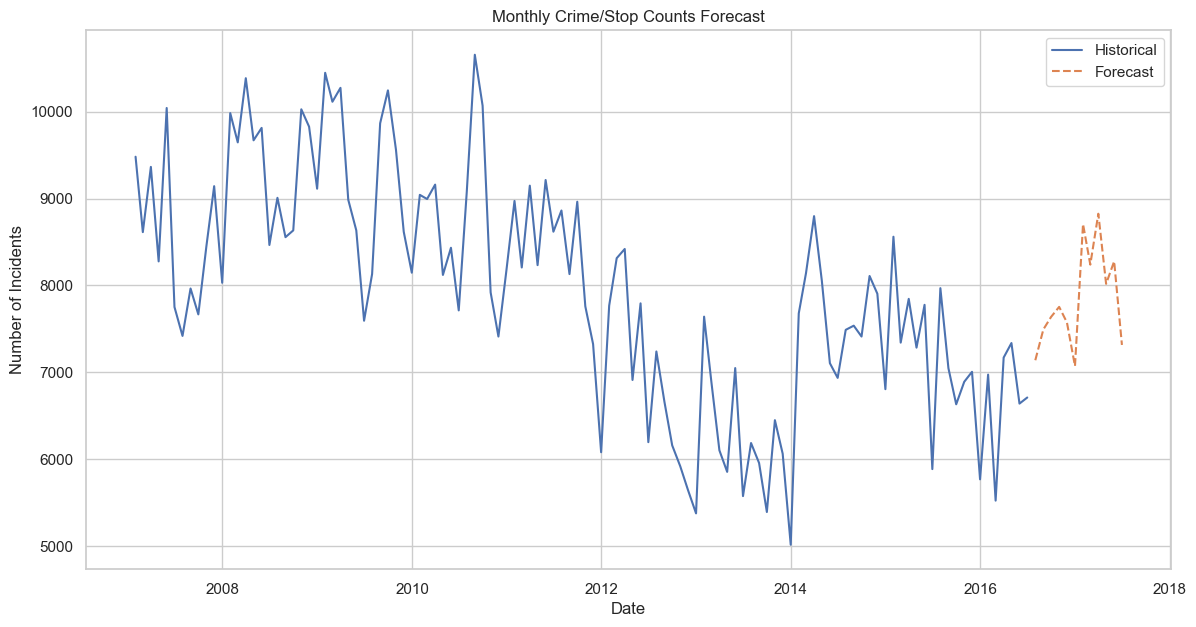

In [273]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit a Holt-Winters model
model = ExponentialSmoothing(monthly_time_series, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(12)

# Plot the forecast
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_time_series, label='Historical')
sns.lineplot(data=forecast, label='Forecast', linestyle='--')
plt.title('Monthly Crime/Stop Counts Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()



The analysis shows that the two most common types of violations are moving violations and mechanical or non-motion violations. These categories consistently represent the majority of offenses.

The data reveals that the highest number of crimes occurred in 2008, after which there was a gradual decline until a slight increase in 2014. This uptick in 2014 could be due to several factors, such as changes in law enforcement practices, population growth, or socio-economic factors that influenced crime rates.

When examining the time of day, most crimes tend to occur during the evening hours, particularly between 10 PM and 11 PM. Interestingly, crime rates during night hours (midnight to early morning) are notably low, which may be due to a combination of lower street activity and increased police presence during these times.

In terms of seasonal patterns, the month of March stands out as having the highest crime rate, followed by a slight decrease throughout the second half of the year. However, no significant differences are observed in crime rates based on days of the week or days of the month.

Looking ahead, the forecast suggests a slight increase in crimes over the next 12 months (2016–2017). This could indicate the beginning of a new upward trend, and it would be important for law enforcement to monitor this closely for potential preventative measures.

## Geospatial Crime Analysis



In [274]:
locations = police_data[['lat','lng']].dropna()
crime_locations = list(zip(locations.lat, locations.lng))

base_map = folium.Map(location=(37.773972, -122.431297), zoom_start=8)
heatmap = plugins.HeatMap(crime_locations, radius=5, blur=2)
base_map.add_child(heatmap)
base_map.save("heat_map_sf.html")

The analysis indicates that the majority of stops and crimes occur predominantly in the downtown area of San Francisco. This concentration of incidents in the city’s urban core is likely due to the higher population density and greater economic activity.

## Conclusion

This analysis of San Francisco crime data has provided several key insights that can inform future decision-making and resource allocation:

### 1. **Crime Concentration in Downtown Areas**:
The majority of stops and crimes occur in the downtown region, indicating that this area requires focused law enforcement efforts. The high density and activity levels in this area likely contribute to the elevated crime rates.

### 2. **Peak Crime Times**:
The data shows that most crimes occur between **10 PM and 11 PM**, with surprisingly low crime rates during the night hours (midnight to early morning). This finding suggests that law enforcement agencies could optimize their patrol schedules to align with these high-crime periods.

### 3. **Demographic Patterns**:
The highest stop rates are seen in individuals aged **25 to 35**, with little variation between different genders or races. However, the heatmap analysis revealed an interesting pattern where individuals identified as "Black" were just as likely to receive a warning as a citation, which is not seen in other racial groups.

### 4. **Seasonal Trends**:
The peak month for crimes is **March**, followed by a slight decrease in the latter part of the year. Understanding these seasonal fluctuations can help allocate resources during high-crime months.

### 5. **Future Crime Forecast**:
Projections suggest a slight increase in crime over the next 12 months (2016-2017), indicating a potential upward trend that law enforcement should closely monitor.

## Next Steps:
To build upon these findings, future work could involve:
- Developing **predictive models** to anticipate crime trends and enable more proactive policing.
- Investigating further into the **racial disparities** in outcomes to understand why certain groups experience different rates of citations versus warnings.
- Using **clustering algorithms** to better identify crime hotspots and refine law enforcement strategies.

